In [32]:
import pandas as pd
import numpy as np
df = pd.read_csv('ds_salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# Goal of analysis:
#### Show relationship between different parameters and effect on salary
#### Create a model to predict a persons salary

In [33]:
df['employee_residence'].isin(df['company_location']).value_counts()

True     3746
False       9
Name: employee_residence, dtype: int64

#### I can see that the difference between "employee_residence" and "company_location" is so small that I can drop one of them as well.

In [34]:
df = df.drop('employee_residence', axis = 'columns')

In [35]:
df.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

 #### I can see that there are no missing values. I will not check for duplicated rows as that would not be unusual in a dataset like this.

In [36]:
print(df['experience_level'].unique())
print(df['employment_type'].unique())
print(df['company_size'].unique())

['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'FL' 'PT']
['L' 'S' 'M']


In [37]:
df['experience_level'].replace(['SE','MI','EN','EX'],
                               ["Senior-level","Mid-level","Entry-level","Executive-level"], inplace = True)
df['employment_type'].replace(['FT','PT','CT','FL'],
                              ["Full-time","Part-time","Contract","Freelance"], inplace = True)
df['company_size'].replace(['L','M','S'],
                          ["Large","Medium","Small"], inplace = True)

#### I rename some variables so that future charts can be more easily understood.

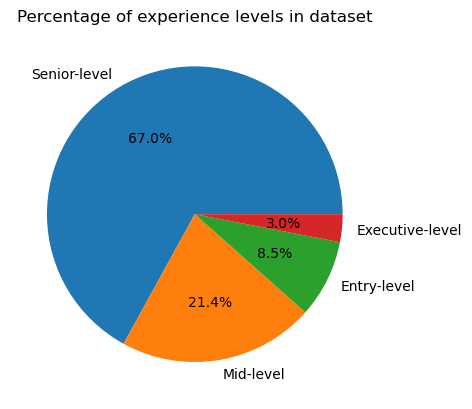

[Text(0.5, 1.0, 'Number of companies by size')]

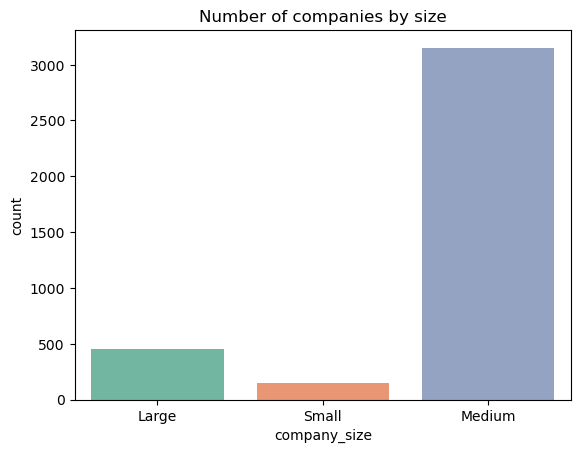

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df['experience_level'].value_counts(), labels=df['experience_level'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage of experience levels in dataset')
plt.show()
sns.countplot(x = df['company_size'], palette = "Set2").set(title = "Number of companies by size")

#### A lot of entries in this dataset are senior-level with mid-level being the second most in the dataset. The dataset also has alot of medium sized companies and not very many large and small companies.

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

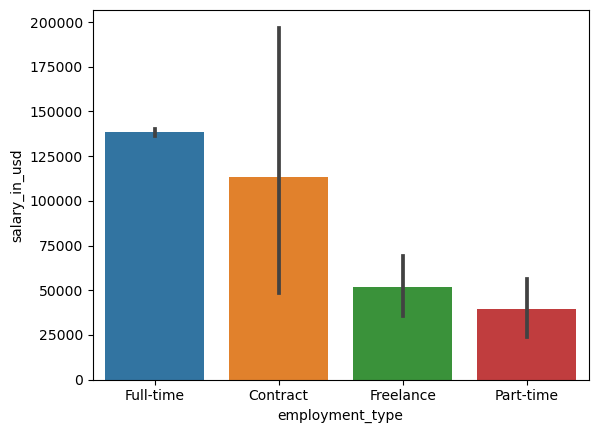

In [39]:
sns.barplot(x = 'employment_type', y = 'salary_in_usd', data = df)

#### This chart shows that those who work full-time earn the most on average while those who work through a contract has the biggest range in salary.

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='experience_level'>

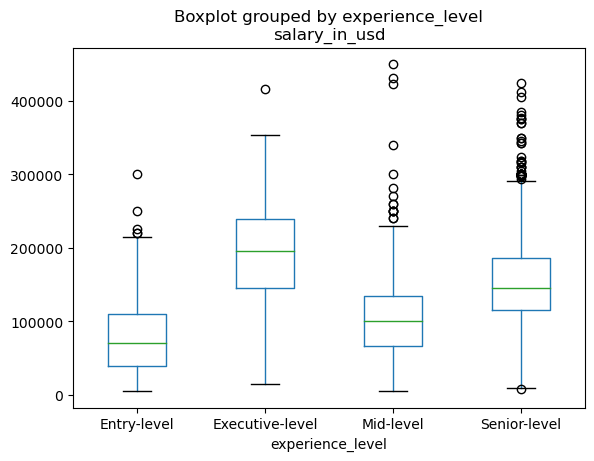

In [40]:
df.boxplot(by = 'experience_level', column = ['salary_in_usd'], grid = False)

#### The boxplot shows that those with higher experience have a higher salary on average. Those in mid-level and senoir-level have a lot of outliers as well.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3755 non-null   int64 
 1   experience_level  3755 non-null   object
 2   employment_type   3755 non-null   object
 3   job_title         3755 non-null   object
 4   salary            3755 non-null   int64 
 5   salary_currency   3755 non-null   object
 6   salary_in_usd     3755 non-null   int64 
 7   remote_ratio      3755 non-null   int64 
 8   company_location  3755 non-null   object
 9   company_size      3755 non-null   object
dtypes: int64(4), object(6)
memory usage: 293.5+ KB


In [42]:
from sklearn.preprocessing import LabelEncoder as le

cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'company_location', 'company_size']
df[cols] = df[cols].apply(le().fit_transform)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   work_year         3755 non-null   int64
 1   experience_level  3755 non-null   int32
 2   employment_type   3755 non-null   int32
 3   job_title         3755 non-null   int32
 4   salary            3755 non-null   int64
 5   salary_currency   3755 non-null   int32
 6   salary_in_usd     3755 non-null   int64
 7   remote_ratio      3755 non-null   int64
 8   company_location  3755 non-null   int32
 9   company_size      3755 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 205.5 KB


#### Since the AI model can only understand numbers I transform all the string values in the dataset into integer values.

<AxesSubplot:>

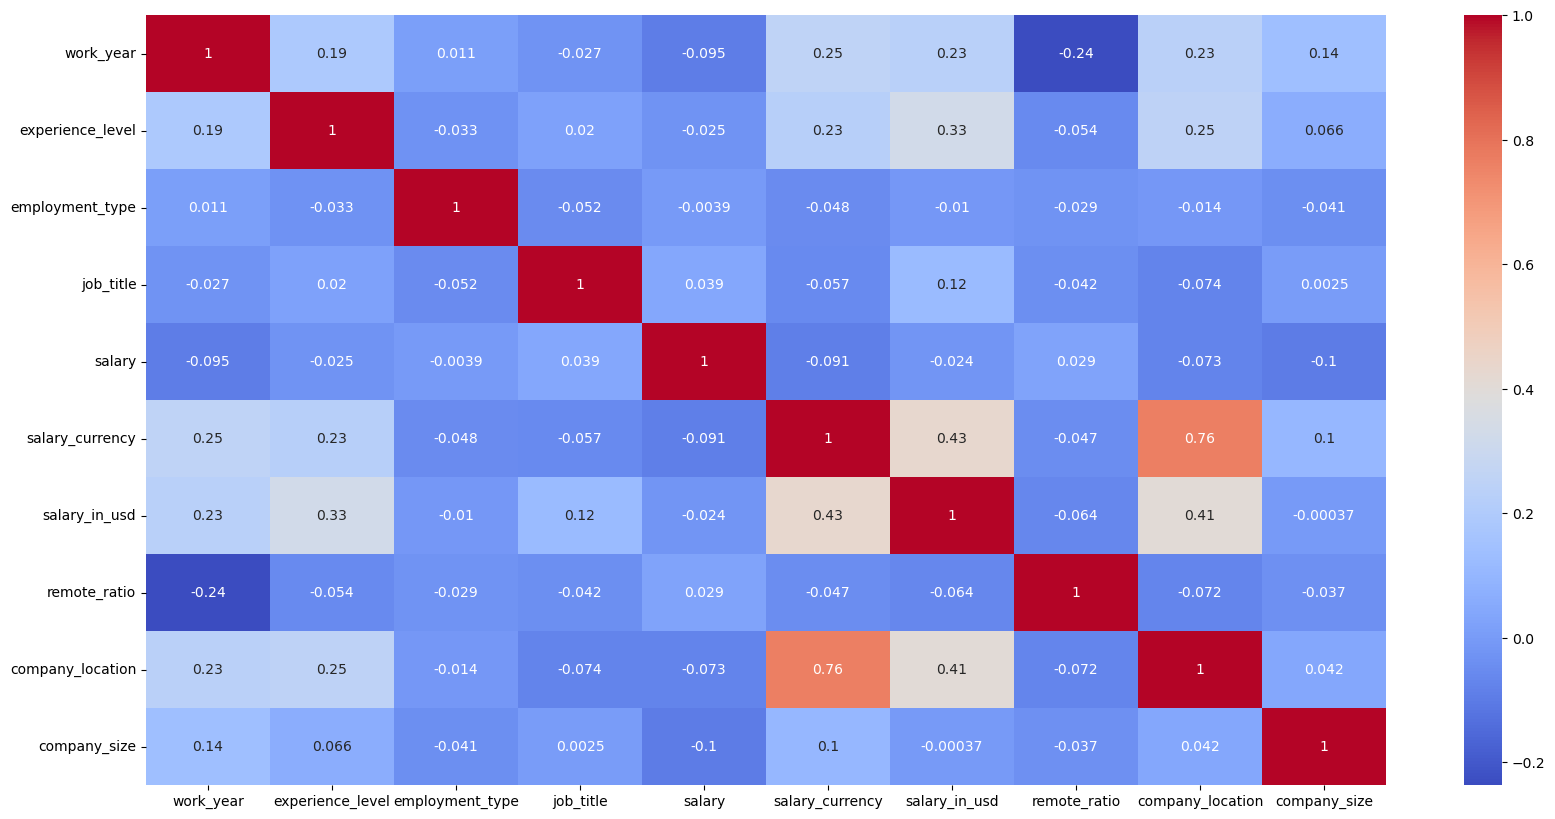

In [43]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

#### This heatmap shows the relationships between all the parameters in the dataset and how each value affects the other values.

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop('salary_in_usd', axis = 1).values
Y = df['salary_in_usd'].values
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size =  0.25, random_state = 42)

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 7, max_features = 3, n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=3)

#### Here I create a random forest model that will predict the salaries of each entry in the dataset.

In [46]:
print("Train score percentage: " + str(rf.score(x_train, y_train) * 100) + "%")
print("Test score percentage: " + str(rf.score(x_test, y_test) * 100) + "%")

Train score percentage: 96.26895224510686%
Test score percentage: 88.21884692209335%


## Final Report
#### In this project I have shown some of the relationship between different parameters and the salaries of individuals who work within Data Science. I created a random forest model as it is a good fit for a dataset like this and the accuracy score show that it is not overfitted. 